<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/XR/Lab4_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 4 X-Ray experiment

Evgeny Kolonsky, 2024

v.0.1.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as find_peaks # Find peaks inside a signal based on peak properties.
from scipy.stats import linregress as linregress #Calculate a linear least-squares regression for two sets of measurements.
from scipy.optimize import curve_fit #Curve fitting

# Calibration

# Mo X-ray spectrum

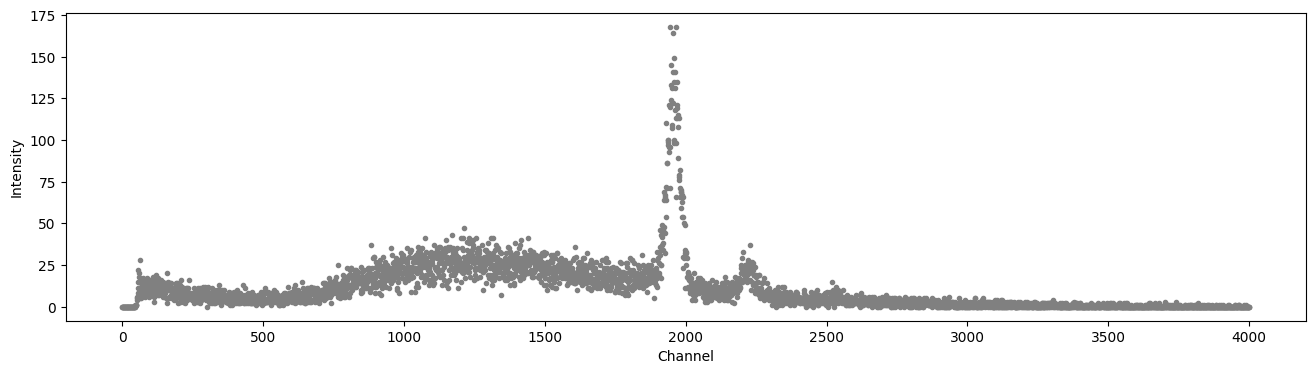

In [21]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Xray/2024.12.11/'
filename = URL+'mo.txt'

channel, signal = np.genfromtxt(filename,
                            delimiter='\t',
                            skip_header=3).T

plt.figure(figsize=(16, 4))
plt.plot(channel, signal, '.', color='gray')
plt.xlabel('Channel')
plt.ylabel('Intensity')
plt.show()

Now we  can take the line profiles and fit it with curve_fit function from scipy.optimize module to Gaussian fanction with hight.
$$
f(x)=H+A\cdot \exp{\left(\frac{(x-x_0)^2}{2σ^2}\right)}
$$

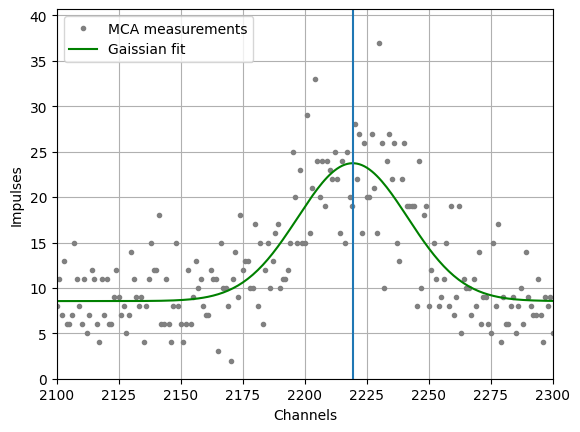

In [4]:

def Gauss(x, H, A, x0, sigma):
  return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

ix0, ix1 = 2100, 2300
ix = (channel > ix0) & ( channel <ix1)
initial_params = [ np.min(signal[ix]),
                   np.max(signal[ix]),
                   int( (ix1 + ix0) /2),
                   50]
fit, _ = curve_fit(Gauss, channel[ix], signal[ix], p0=initial_params);

x0 = fit[2]
plt.plot(channel, signal, '.', color='gray', label=r'MCA measurements') # plot the line and save the appropriate label.
plt.plot(channel, Gauss(channel, *fit), color='green', label=r'Gaissian fit') # plot the line and save the appropriate label.

plt.axvline(x0) # plot the estimation


plt.ylabel('Impulses') #Y axis label
plt.xlabel('Channels') #X axis label
plt.xlim(ix0, ix1)
plt.ylim(0, np.max(signal[ix])*1.1)
plt.grid() #put grid, optional
plt.legend() # put the legends

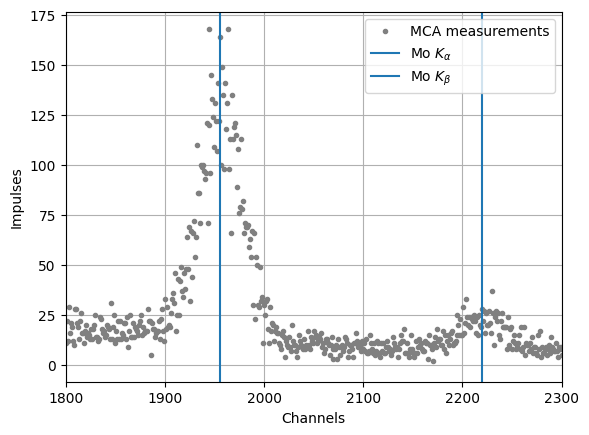

In [22]:
def get_peak(channel, signal, ix0, ix1):
  ix = (channel > ix0) & ( channel <ix1)
  initial_params = [ np.min(signal[ix]),
                   np.max(signal[ix]),
                   int( (ix1 + ix0) /2),
                   50]
  fit, _ = curve_fit(Gauss, channel[ix], signal[ix], p0=initial_params);
  peak = fit[2]
  return peak

URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Xray/2024.12.11/'
filename = URL+'mo.txt'

channel, signal = np.genfromtxt(filename,
                            delimiter='\t',
                            skip_header=3).T

plt.plot(channel, signal, '.', color='gray', label=r'MCA measurements') # plot the line and save the appropriate label.

Mo_K_alpha = get_peak(channel, signal, ix0=1800, ix1=2100)
Mo_K_beta = get_peak(channel, signal, ix0=2100, ix1=2300)

plt.axvline(Mo_K_alpha, label=r'Mo $K_{\alpha}$') # plot the estimation
plt.axvline(Mo_K_beta, label=r'Mo $K_{\beta}$') # plot the estimation


plt.ylabel('Impulses') #Y axis label
plt.xlabel('Channels') #X axis label
plt.xlim(1800, 2300)
#plt.ylim(0, np.max(signal[ix])*1.1)
plt.grid() #put grid, optional
plt.legend() # put the legends


# Ferrum

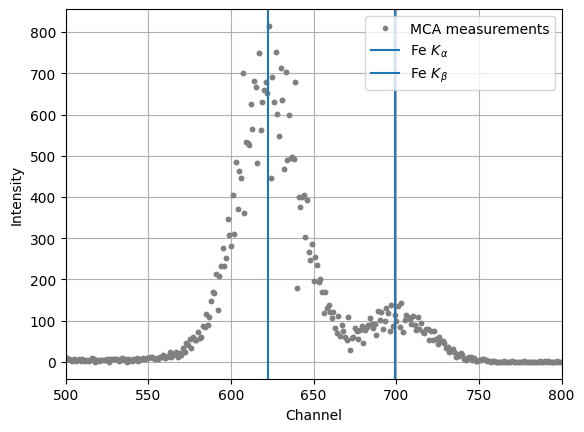

In [25]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Xray/2024.12.11/'
filename = URL+'fe.txt'

channel, signal = np.genfromtxt(filename,
                            delimiter='\t',
                            skip_header=3).T
plt.plot(channel, signal, '.', color='gray')

plt.plot(channel, signal, '.', color='gray', label=r'MCA measurements') # plot the line and save the appropriate label.

Fe_K_alpha = get_peak(channel, signal, ix0=550, ix1=660)
Fe_K_beta = get_peak(channel, signal, ix0=675, ix1=750)

plt.axvline(Fe_K_alpha, label=r'Fe $K_{\alpha}$') # plot the estimation
plt.axvline(Fe_K_beta, label=r'Fe $K_{\beta}$') # plot the estimation


plt.grid() #put grid, optional
plt.legend() # put the legends
plt.xlabel('Channel')
plt.ylabel('Intensity')
plt.xlim(500, 800)
plt.show()

## Zn

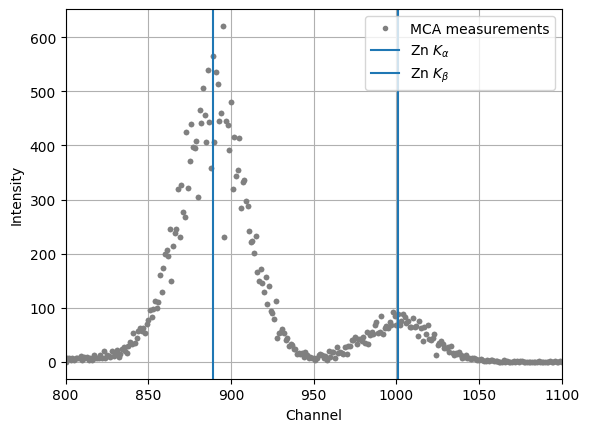

In [28]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Xray/2024.12.11/'
filename = URL+'zn.txt'

channel, signal = np.genfromtxt(filename,
                            delimiter='\t',
                            skip_header=3).T
plt.plot(channel, signal, '.', color='gray')

plt.plot(channel, signal, '.', color='gray', label=r'MCA measurements') # plot the line and save the appropriate label.

Zn_K_alpha = get_peak(channel, signal, ix0=850, ix1=950)
Zn_K_beta = get_peak(channel, signal, ix0=950, ix1=1050)

plt.axvline(Zn_K_alpha, label=r'Zn $K_{\alpha}$') # plot the estimation
plt.axvline(Zn_K_beta, label=r'Zn $K_{\beta}$') # plot the estimation


plt.grid() #put grid, optional
plt.legend() # put the legends
plt.xlabel('Channel')
plt.ylabel('Intensity')
plt.xlim(800, 1100)
plt.show()

## Pb

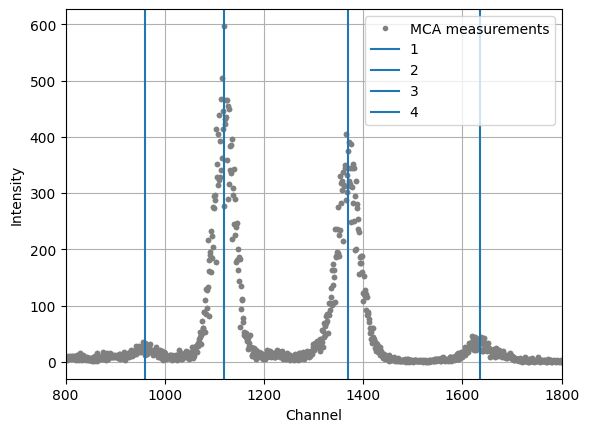

In [31]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Xray/2024.12.11/'
filename = URL+'pb.txt'

channel, signal = np.genfromtxt(filename,
                            delimiter='\t',
                            skip_header=3).T
plt.plot(channel, signal, '.', color='gray')

plt.plot(channel, signal, '.', color='gray', label=r'MCA measurements') # plot the line and save the appropriate label.

Pb_1 = get_peak(channel, signal, ix0=900, ix1=1000)
Pb_2 = get_peak(channel, signal, ix0=1000, ix1=1200)
Pb_3 = get_peak(channel, signal, ix0=1300, ix1=1500)
Pb_4 = get_peak(channel, signal, ix0=1500, ix1=1800)

plt.axvline(Pb_1, label=r'1') # plot the estimation
plt.axvline(Pb_2, label=r'2') # plot the estimation
plt.axvline(Pb_3, label=r'3') # plot the estimation
plt.axvline(Pb_4, label=r'4') # plot the estimation


plt.grid() #put grid, optional
plt.legend() # put the legends
plt.xlabel('Channel')
plt.ylabel('Intensity')
plt.xlim(800, 1800)
plt.show()

## Photon energies and relative intensities

[.pdf](https://moodle24.technion.ac.il/pluginfile.php/73814/mod_resource/content/1/Table_1-3.pdf)



In [52]:
import requests

filename = URL+'energies.txt'

# Fetch the content of the file from the URL
response = requests.get(filename)
# Iterate over lines in the response content
for line in response.text.splitlines():
    energy, _, element, level, rel_intensity = line.split('\t')
    if element == 'Pb':
      energy = float(energy)
      rel_intensity = float(rel_intensity)
      if   energy > 1e3:
        print(element, level, energy, rel_intensity)

Pb Mα 2345.5 100.0
Pb Ll 9184.5 6.0
Pb Lα 10449.5 11.0
Pb Lα 10551.5 100.0
Pb Lβ 12613.7 66.0
Pb Lβ 12622.6 25.0
Pb Lγ 14764.4 14.0
